In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
tesla = pd.read_csv('TSLA.csv')
tesla = tesla[['Date','Open','High','Low','Close']]
print(tesla.shape)
tesla.head()

(252, 5)


,Date,Open,High,Low,Close
0,2017-02-28,244.190002,251.000000,243.899994,249.990005
1,2017-03-01,254.179993,254.850006,249.110001,250.020004
2,2017-03-02,249.710007,253.279999,248.270004,250.479996
3,2017-03-03,250.740005,251.899994,249.000000,251.570007
4,2017-03-06,247.910004,251.699997,247.509995,251.210007


In [4]:
tesla_2011 = pd.read_csv('TSLA-2011.csv')
tesla_2011 = tesla_2011[['Date','Open','High','Low','Close']]
print(tesla_2011.shape)
tesla_2011.head()

(1763, 5)


,Date,Open,High,Low,Close
0,2011-02-28,23.740000,24.100000,23.500000,23.889999
1,2011-03-01,24.049999,24.320000,23.700001,23.940001
2,2011-03-02,23.820000,24.280001,23.730000,24.020000
3,2011-03-03,24.480000,24.790001,24.059999,24.360001
4,2011-03-04,24.480000,24.990000,23.780001,24.950001


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


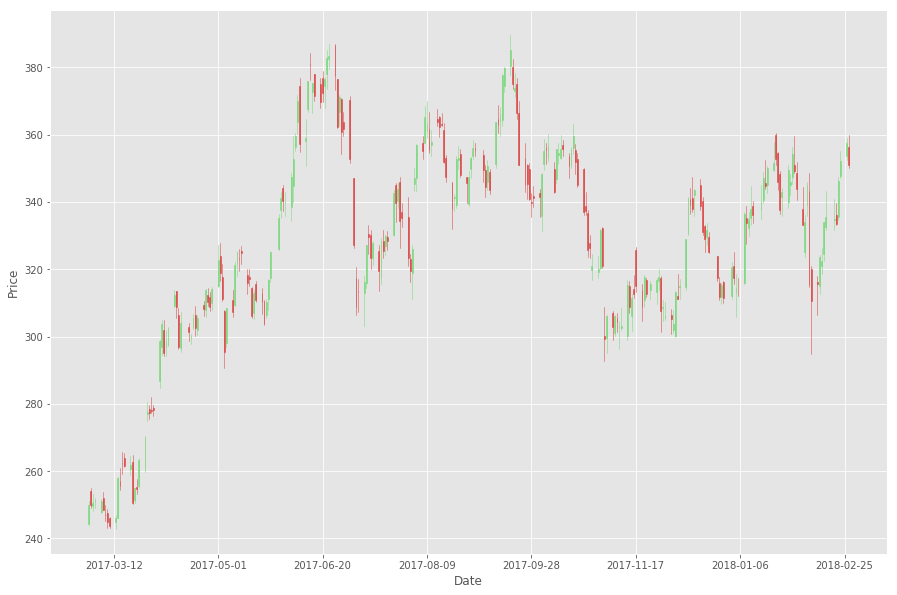

In [5]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = tesla.copy()
df_cp.Date = date2num(pd.to_datetime(tesla.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

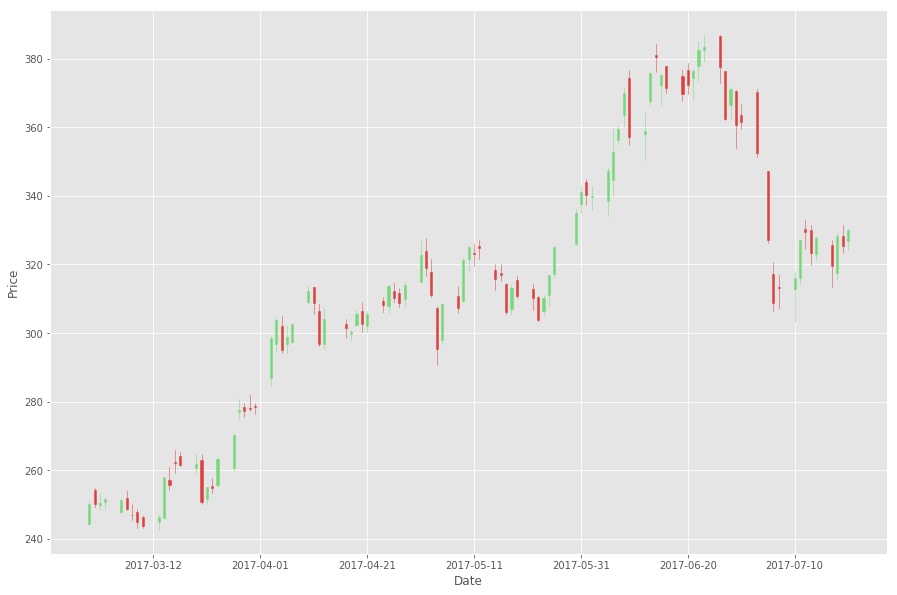

In [6]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

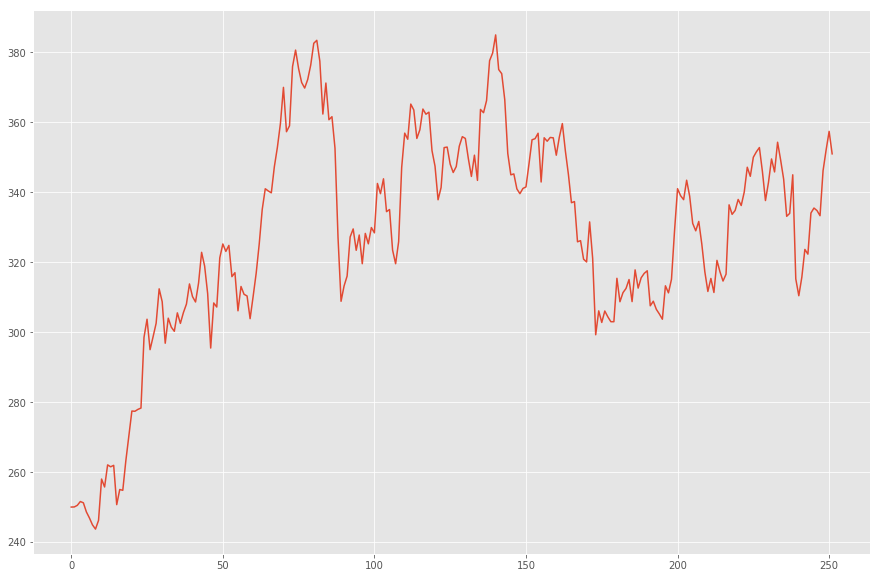

In [7]:
tesla.Close.plot()

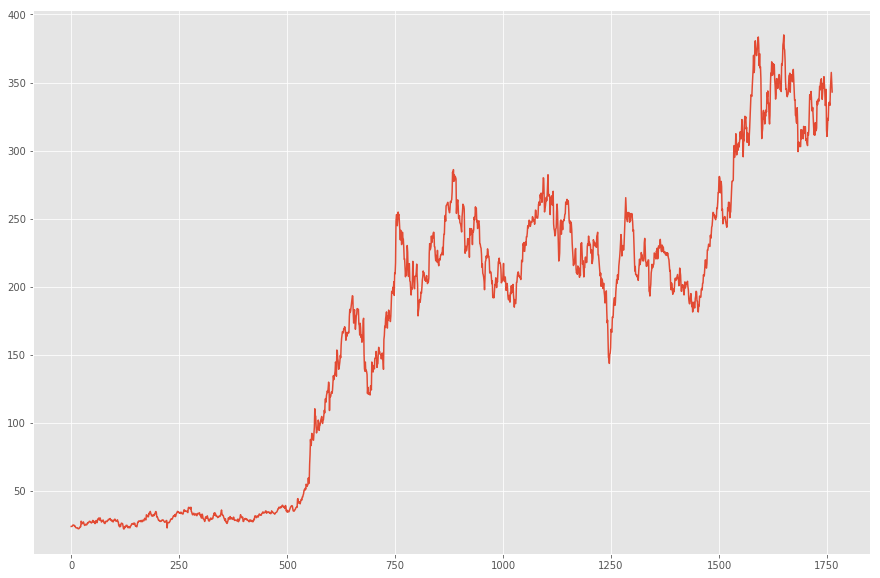

In [8]:
tesla_2011.Close.plot()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


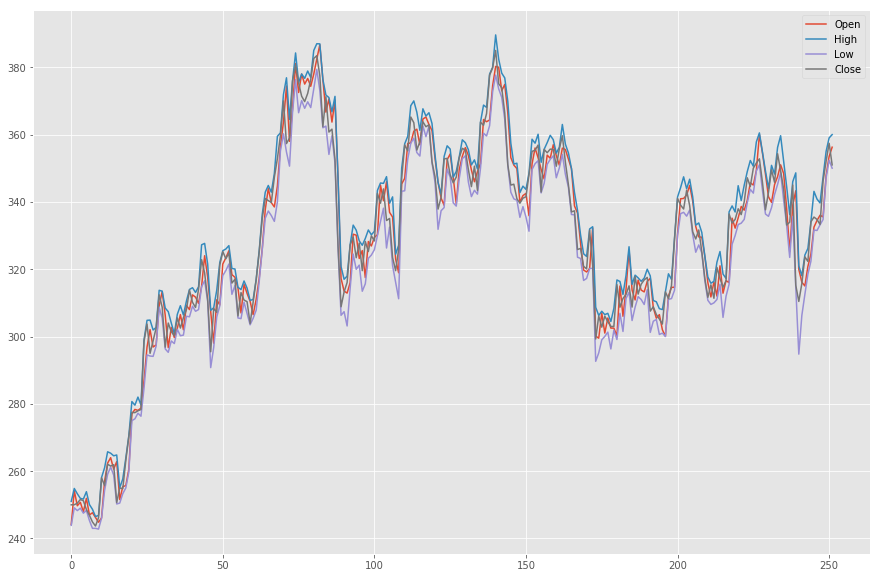

In [9]:
tesla.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


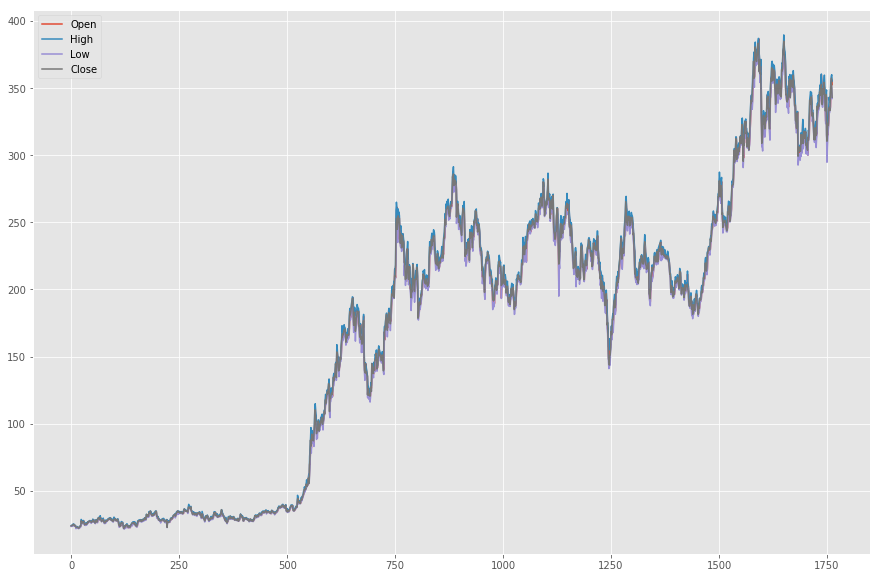

In [10]:
tesla_2011.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

In [11]:
tesla_2011['months'] = pd.DatetimeIndex(tesla_2011['Date']).month
tesla_2011['year'] = pd.DatetimeIndex(tesla_2011['Date']).year
tesla_2011.head()

,Date,Open,High,Low,Close,months,year
0,2011-02-28,23.740000,24.100000,23.500000,23.889999,2,2011
1,2011-03-01,24.049999,24.320000,23.700001,23.940001,3,2011
2,2011-03-02,23.820000,24.280001,23.730000,24.020000,3,2011
3,2011-03-03,24.480000,24.790001,24.059999,24.360001,3,2011
4,2011-03-04,24.480000,24.990000,23.780001,24.950001,3,2011


In [12]:
teslaPivot = pd.pivot_table(tesla_2011, values = "Close", columns = "year", index = "months")

In [13]:
teslaPivot.head()

year,2011,2012,2013,2014,2015,2016,2017,2018
months,,,,,,,,
1,NaN,27.490000,35.188571,164.051905,203.255499,204.562105,239.320499,338.583335
2,23.889999,32.762000,37.366316,206.023157,210.673159,169.670000,263.711058,335.777369
3,23.708696,35.240910,37.043000,233.146667,194.718184,216.147273,258.156522,NaN
4,26.166000,33.495000,46.235455,208.287619,211.611428,250.959050,304.758424,NaN
5,27.612857,30.773636,81.399091,199.674286,242.220499,216.633809,316.524091,NaN


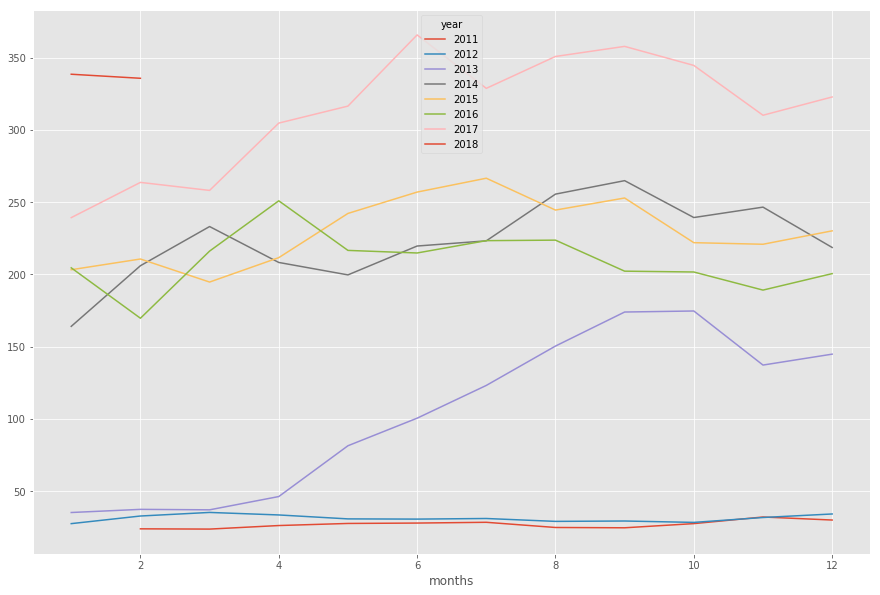

In [14]:
teslaPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c086512e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0c083bd320>]], dtype=object)

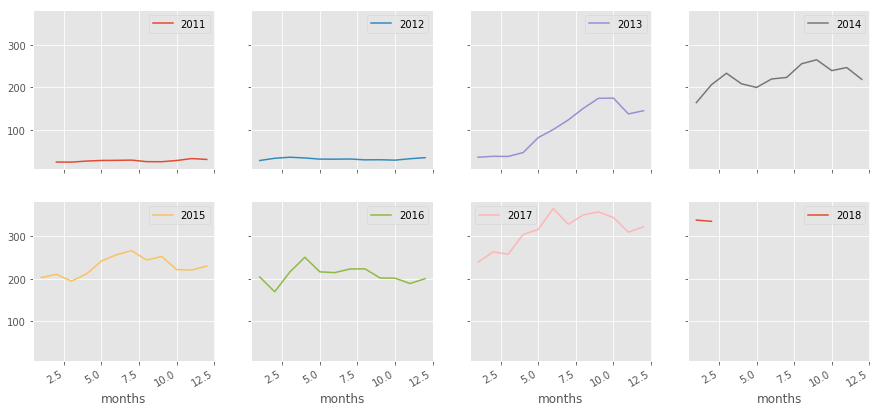

In [15]:
teslaPivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)

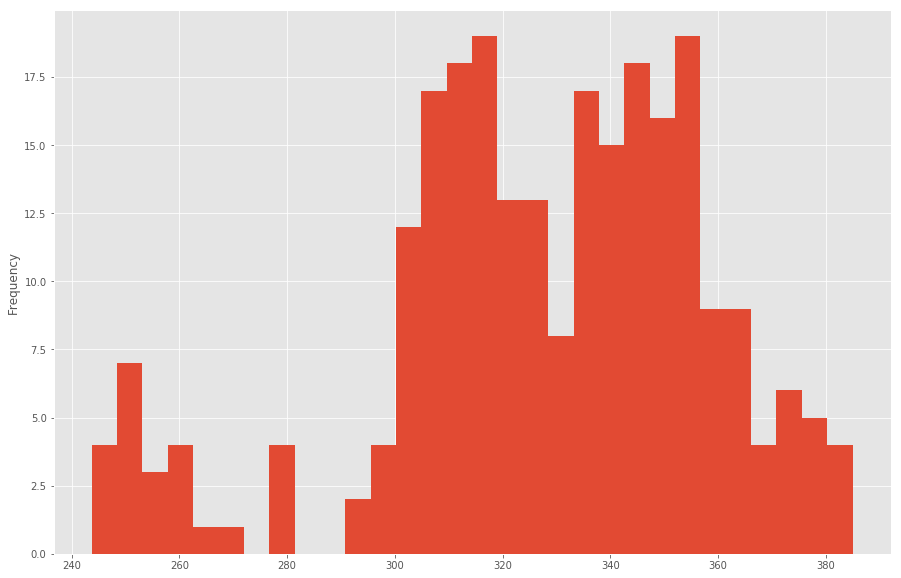

In [16]:
tesla.Close.plot(kind = "hist", bins = 30)

In [17]:
tesla['Closelog'] = np.log(tesla.Close)
tesla.head()

,Date,Open,High,Low,Close,Closelog
0,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421
1,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541
2,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379
3,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721
4,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289


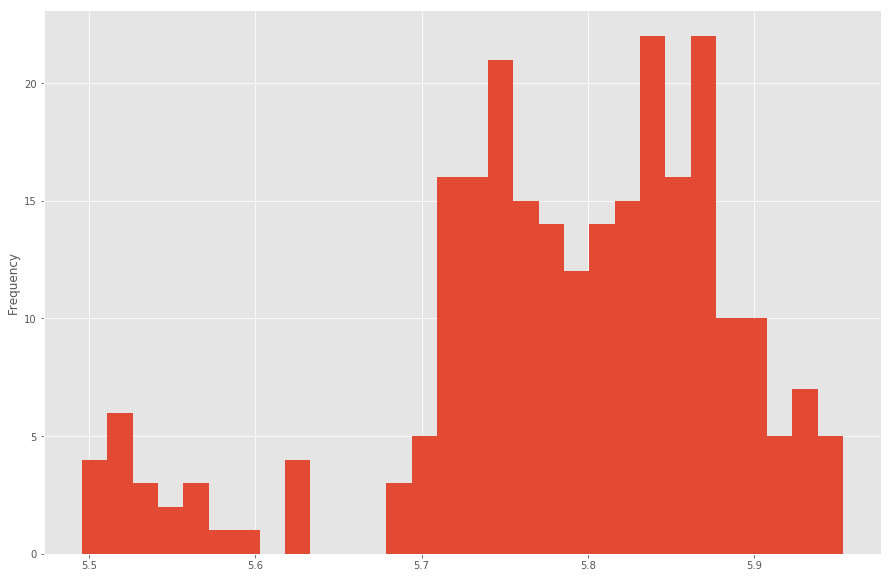

In [18]:
tesla.Closelog.plot(kind = "hist", bins = 30)

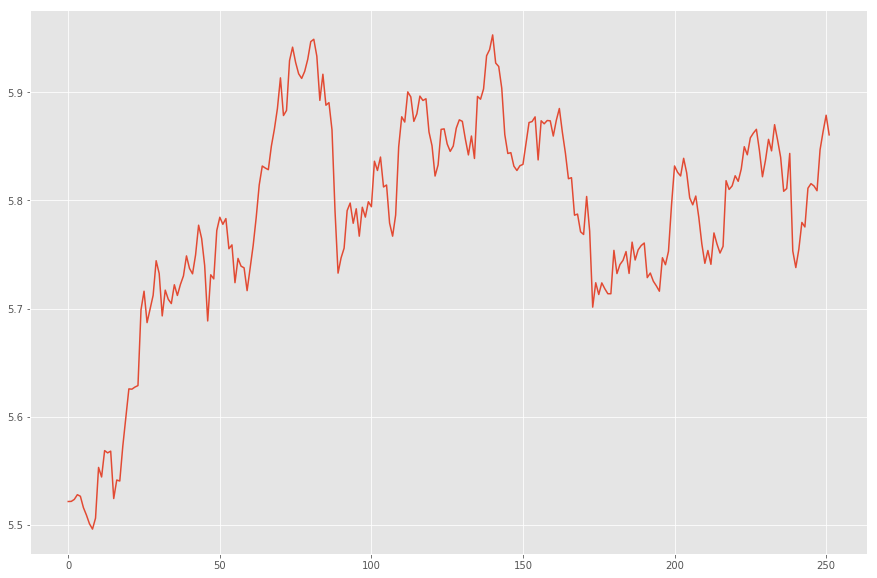

In [19]:
tesla.Closelog.plot()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/usr/local/lib/python3.5/dist-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


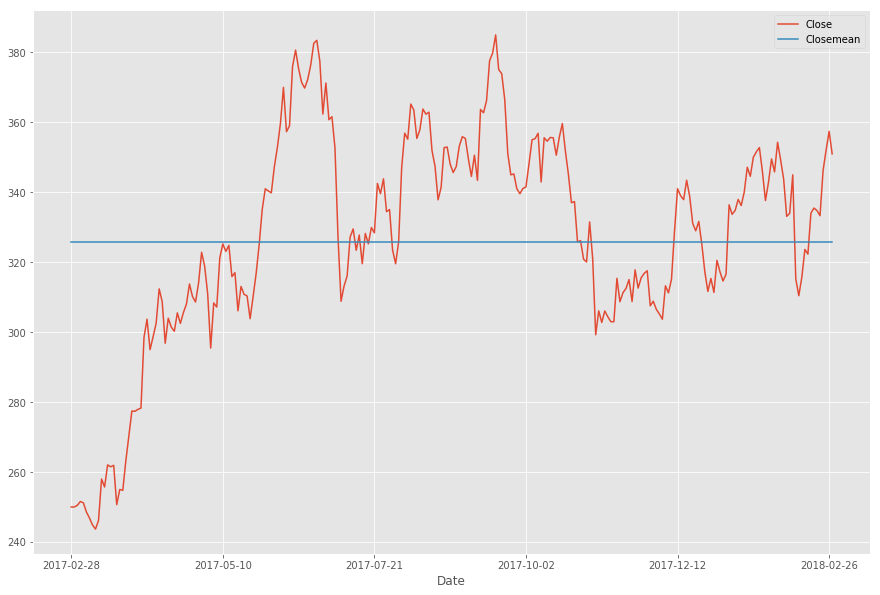

In [20]:
model_mean_pred = tesla.Closelog.mean()
# reverse log e
tesla["Closemean"] = np.exp(model_mean_pred)
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean"])

In [21]:
from sklearn import linear_model
x = np.arange(tesla.shape[0]).reshape((-1,1))
y = tesla.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/usr/local/lib/python3.5/dist-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


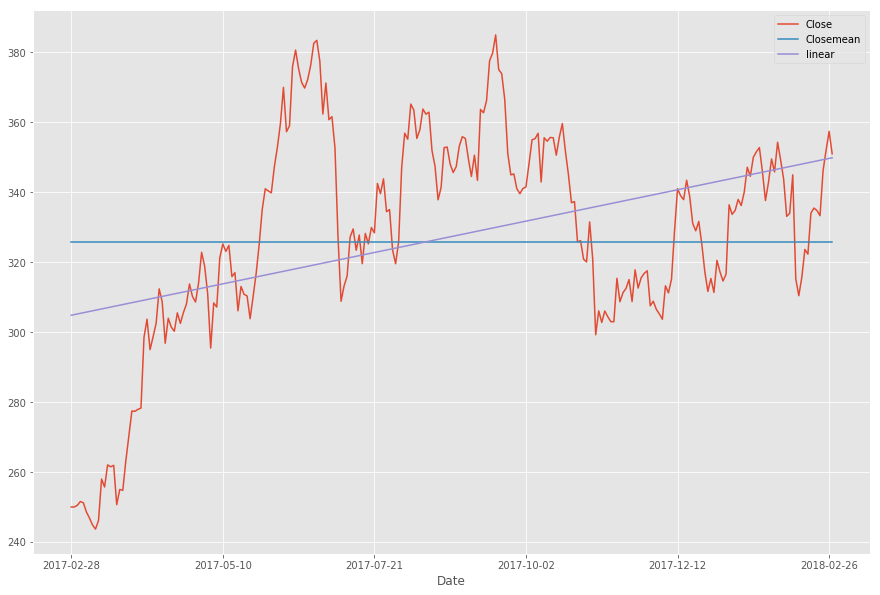

In [22]:
tesla['linear'] = pred
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean", "linear"])

In [23]:
tesla.Date = pd.DatetimeIndex(tesla.Date)
tesla.index = pd.PeriodIndex(tesla.Date, freq='D')
tesla = tesla.sort_values(by = "Date")
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear
Date,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951


In [24]:
tesla['timeIndex']= tesla.Date - tesla.Date.min()
tesla["timeIndex"] =tesla["timeIndex"] / np.timedelta64(1, 'D')
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex
Date,,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457,0.0
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830,1.0
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204,2.0
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577,3.0
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951,6.0


In [25]:
tesla["timeIndex"] = tesla["timeIndex"].round(0).astype(int)
tesla.tail()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex
Date,,,,,,,,,
2018-02-21,2018-02-21,336.029999,339.690002,333.170013,333.299988,5.809043,325.799915,349.148732,358
2018-02-22,2018-02-22,335.529999,347.440002,334.750000,346.170013,5.846930,325.799915,349.328106,359
2018-02-23,2018-02-23,347.829987,354.989990,347.100006,352.049988,5.863773,325.799915,349.507479,360
2018-02-26,2018-02-26,353.500000,359.000000,352.359985,357.420013,5.878912,325.799915,349.686853,363
2018-02-27,2018-02-27,356.250000,359.989990,350.010010,350.989990,5.860758,325.799915,349.866226,364


In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
model_linear = smf.ols('Closelog ~ timeIndex', data = tesla).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Closelog   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     61.96
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           1.06e-13
Time:                        12:11:44   Log-Likelihood:                 252.42
No. Observations:                 252   AIC:                            -500.8
Df Residuals:                     250   BIC:                            -493.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7105      0.011    512.194      0.000       5.689       5.732
timeIndex      0.0004   5.34e-05      7.871      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.098   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.174
Skew:                          -0.198   Prob(JB):                        0.337
Kurtosis:                       2.777   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_linear.params

Intercept    5.710491
timeIndex    0.000421
dtype: float64

In [29]:
model_linear_pred = model_linear.predict()
model_linear_pred.shape

(252,)

In [30]:
tesla['linear_stats'] = model_linear_pred
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats
Date,,,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457,0,5.710491
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830,1,5.710911
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204,2,5.711332
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577,3,5.711753
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951,6,5.713015


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


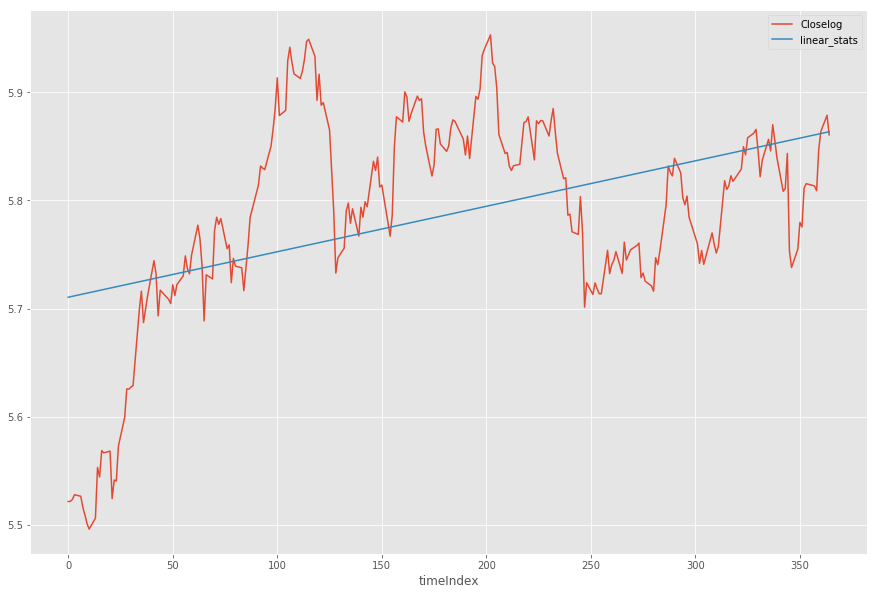

In [31]:
tesla.plot(kind="line", x="timeIndex", y = ["Closelog", 'linear_stats'])

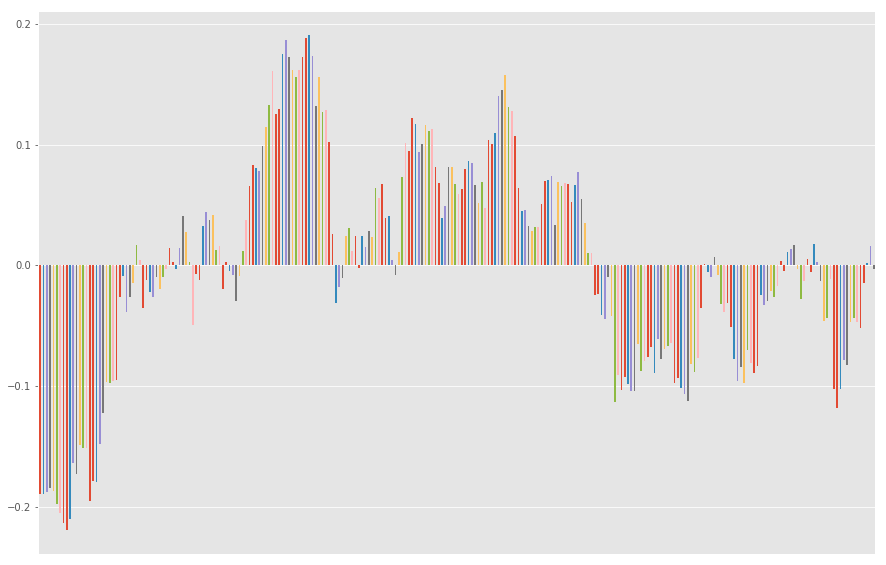

In [32]:
model_linear.resid.plot(kind = "bar").get_xaxis().set_visible(False)

In [33]:
model_linear_forecast_auto = model_linear.predict(exog = pd.DataFrame(dict(timeIndex=252), index=[0]))
model_linear_forecast_auto

0    5.816514
dtype: float64

In [34]:
tesla['pricelinear'] = np.exp(model_linear_pred)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear
Date,,,,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457,0,5.710491,302.019237
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830,1,5.710911,302.146332
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204,2,5.711332,302.273480
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577,3,5.711753,302.400681
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951,6,5.713015,302.782607


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


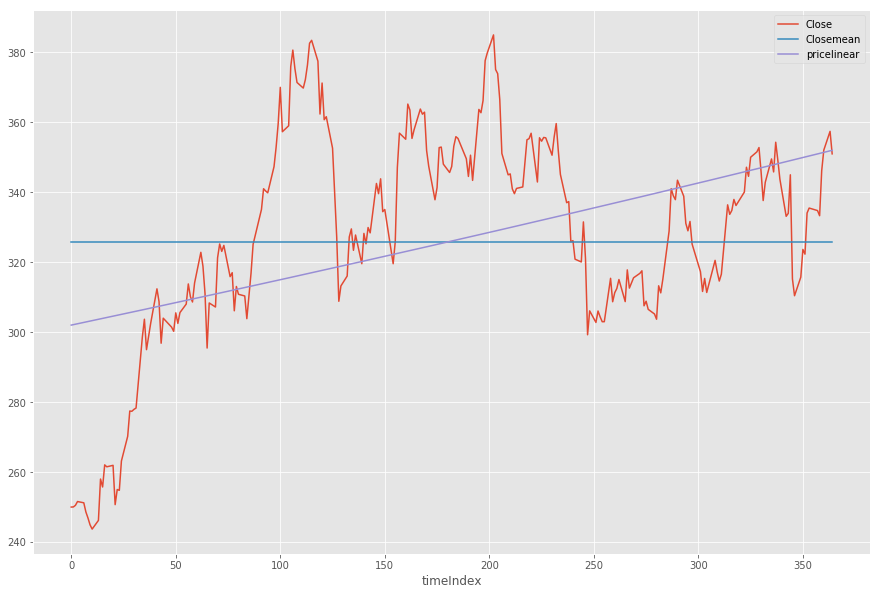

In [35]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear"])

In [36]:
tesla["CloselogShift1"] = tesla.Closelog.shift()
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1
Date,,,,,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457,0,5.710491,302.019237,NaN
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830,1,5.710911,302.146332,5.521421
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204,2,5.711332,302.273480,5.521541
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577,3,5.711753,302.400681,5.523379
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951,6,5.713015,302.782607,5.527721


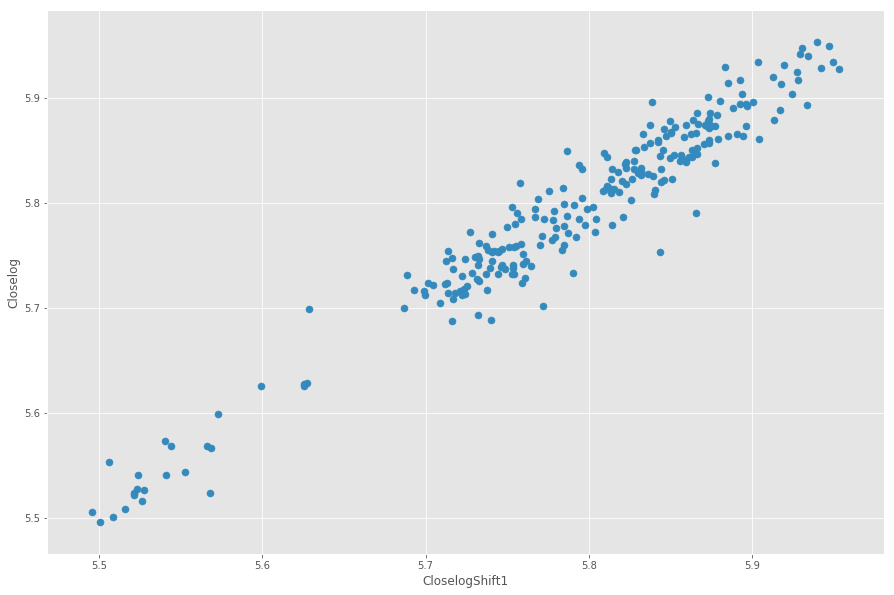

In [37]:
tesla.plot(kind= "scatter", y = "Closelog", x = "CloselogShift1", s = 50)

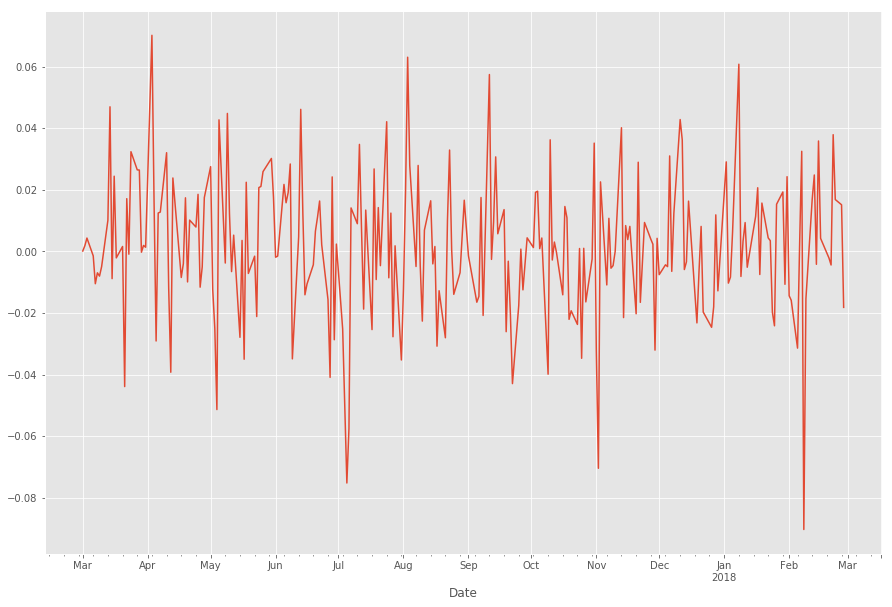

In [38]:
tesla["CloselogDiff"] = tesla.Closelog - tesla.CloselogShift1
tesla.CloselogDiff.plot()

In [61]:
tesla["CloseRandom"] = np.exp(tesla.CloselogShift1)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloselogMA12,CloselogExp12,priceExp12,CloseRandom
Date,,,,,,,,,,,,,,,,,
2017-02-28,2017-02-28,244.190002,251.000000,243.899994,249.990005,5.521421,325.799915,304.843457,0,5.710491,302.019237,NaN,NaN,NaN,5.521421,249.990005,NaN
2017-03-01,2017-03-01,254.179993,254.850006,249.110001,250.020004,5.521541,325.799915,305.022830,1,5.710911,302.146332,5.521421,0.000120,NaN,5.521483,250.005437,249.990005
2017-03-02,2017-03-02,249.710007,253.279999,248.270004,250.479996,5.523379,325.799915,305.202204,2,5.711332,302.273480,5.521541,0.001838,NaN,5.522152,250.172741,250.020004
2017-03-03,2017-03-03,250.740005,251.899994,249.000000,251.570007,5.527721,325.799915,305.381577,3,5.711753,302.400681,5.523379,0.004342,NaN,5.523667,250.552110,250.479996
2017-03-06,2017-03-06,247.910004,251.699997,247.509995,251.210007,5.526289,325.799915,305.560951,6,5.713015,302.782607,5.527721,-0.001432,NaN,5.524254,250.699161,251.570007


In [55]:
def adf(ts):
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)

    orig = plt.plot(ts.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


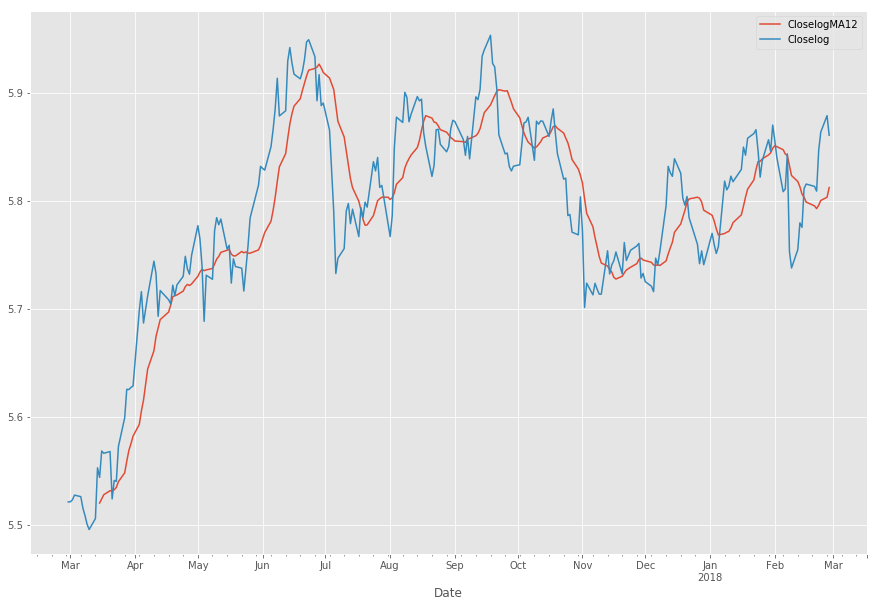

In [40]:
tesla['CloselogMA12'] = pd.rolling_mean(tesla.Closelog, window = 12)
tesla.plot(kind ="line", y=["CloselogMA12", "Closelog"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


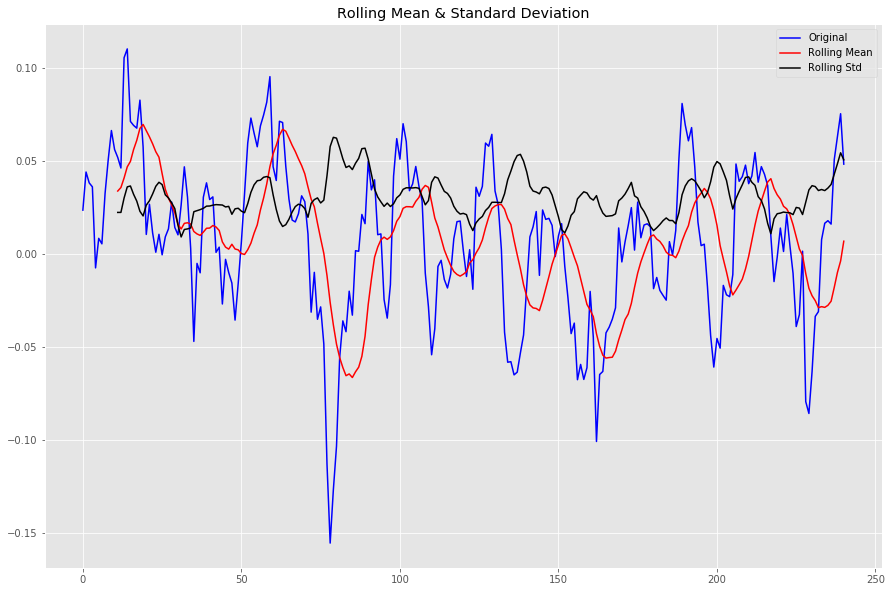

Test Statistic                  -4.702720
p-value                          0.000083
# of Lags Used                   2.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (10%)            -2.573283
Critical Value (5%)             -2.873762
dtype: float64

In [56]:
ts = tesla.Closelog - tesla.CloselogMA12
ts.dropna(inplace = True)
adf(ts)

if test statistic < critical value (any), we can assume this data is stationary.

In [57]:
half_life = 12
tesla['CloselogExp12'] = pd.ewma(tesla.Closelog, halflife=half_life)
1 - np.exp(np.log(0.5)/half_life)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,halflife=12,min_periods=0).mean()
  


0.056125687318306472

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


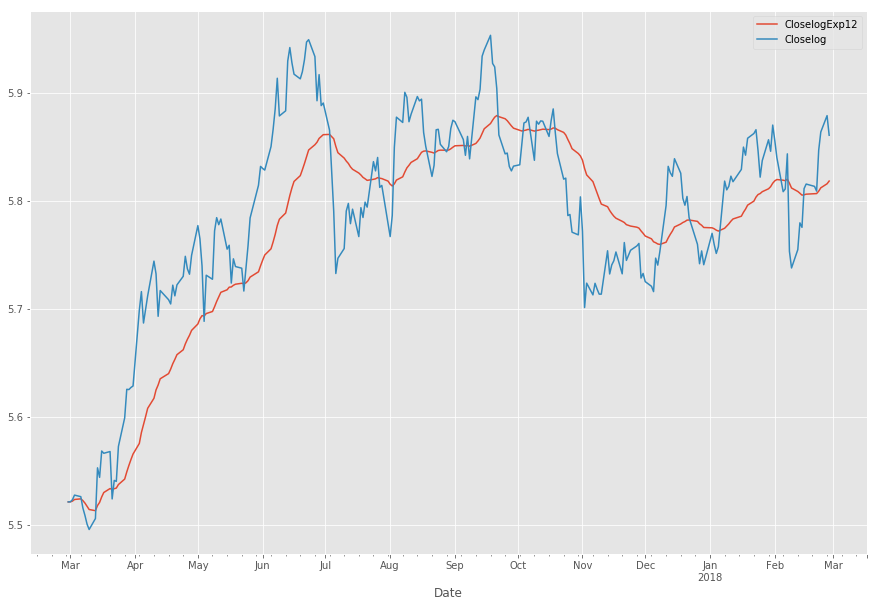

In [58]:
tesla.plot(kind ="line", y=["CloselogExp12", "Closelog"])

In [63]:
tesla["CloseExp12"] = np.exp(tesla.CloselogExp12)
tesla.tail()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloselogMA12,CloselogExp12,priceExp12,CloseRandom,CloseExp12
Date,,,,,,,,,,,,,,,,,,
2018-02-21,2018-02-21,336.029999,339.690002,333.170013,333.299988,5.809043,325.799915,349.148732,358,5.861111,351.114069,5.813444,-0.004401,5.792823,5.806764,332.541286,334.769989,332.541286
2018-02-22,2018-02-22,335.529999,347.440002,334.750000,346.170013,5.846930,325.799915,349.328106,359,5.861532,351.261824,5.809043,0.037887,5.796023,5.809018,333.291795,333.299988,333.291795
2018-02-23,2018-02-23,347.829987,354.989990,347.100006,352.049988,5.863773,325.799915,349.507479,360,5.861953,351.409640,5.846930,0.016843,5.800417,5.812092,334.317627,346.170013,334.317627
2018-02-26,2018-02-26,353.500000,359.000000,352.359985,357.420013,5.878912,325.799915,349.686853,363,5.863215,351.853464,5.863773,0.015138,5.803364,5.815842,335.573780,352.049988,335.573780
2018-02-27,2018-02-27,356.250000,359.989990,350.010010,350.989990,5.860758,325.799915,349.866226,364,5.863636,352.001529,5.878912,-0.018154,5.812319,5.818363,336.420807,357.420013,336.420807


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


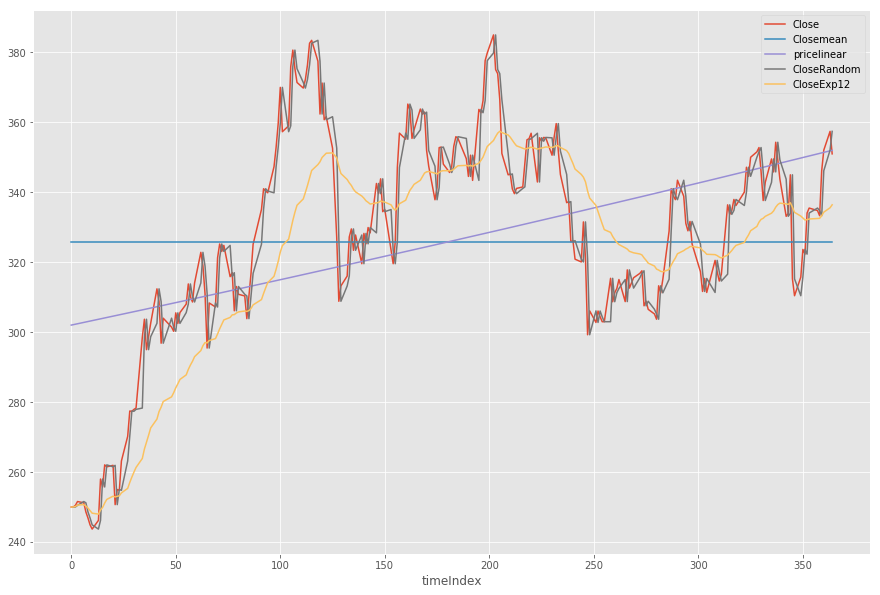

In [65]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear", 
                                             "CloseRandom", "CloseExp12"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


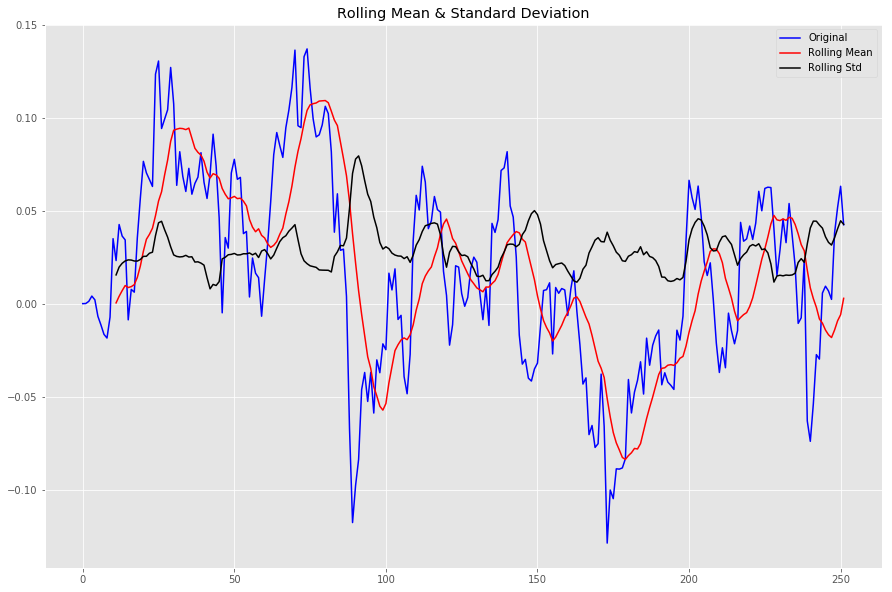

Test Statistic                  -3.321568
p-value                          0.013941
# of Lags Used                   0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (10%)            -2.572944
Critical Value (5%)             -2.873125
dtype: float64

In [67]:
ts = tesla.Closelog - tesla.CloselogExp12
ts.dropna(inplace = True)
adf(ts)

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
tesla.index = tesla.index.to_datetime()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  


In [80]:
decomposition = seasonal_decompose(tesla.Closelog,freq=31)

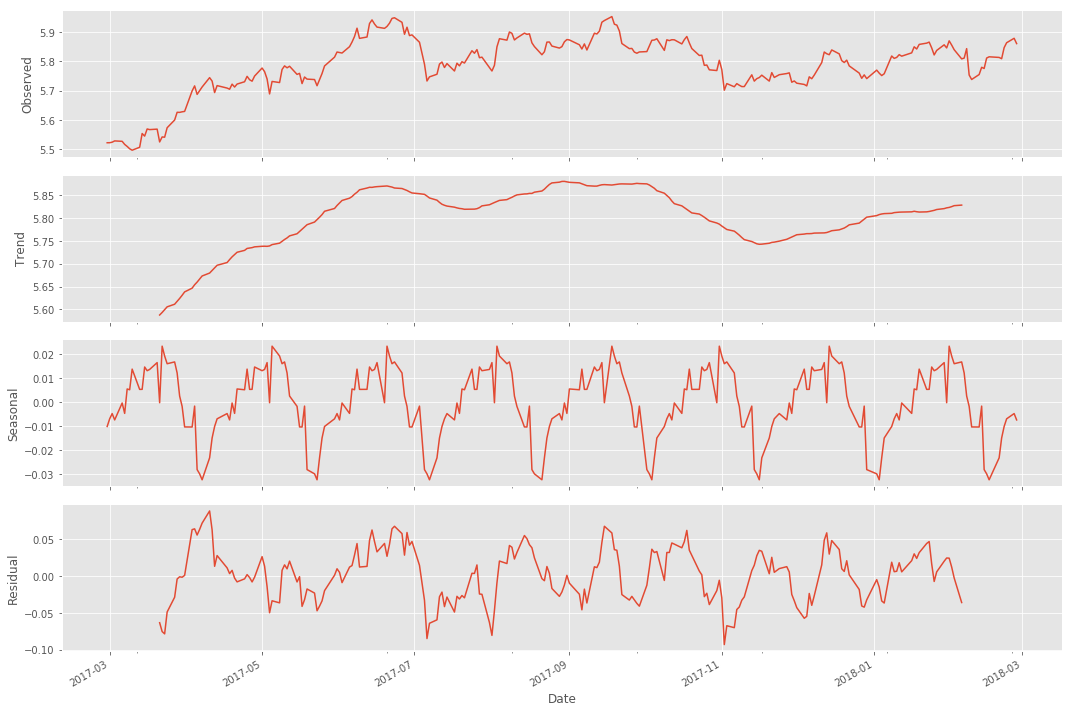

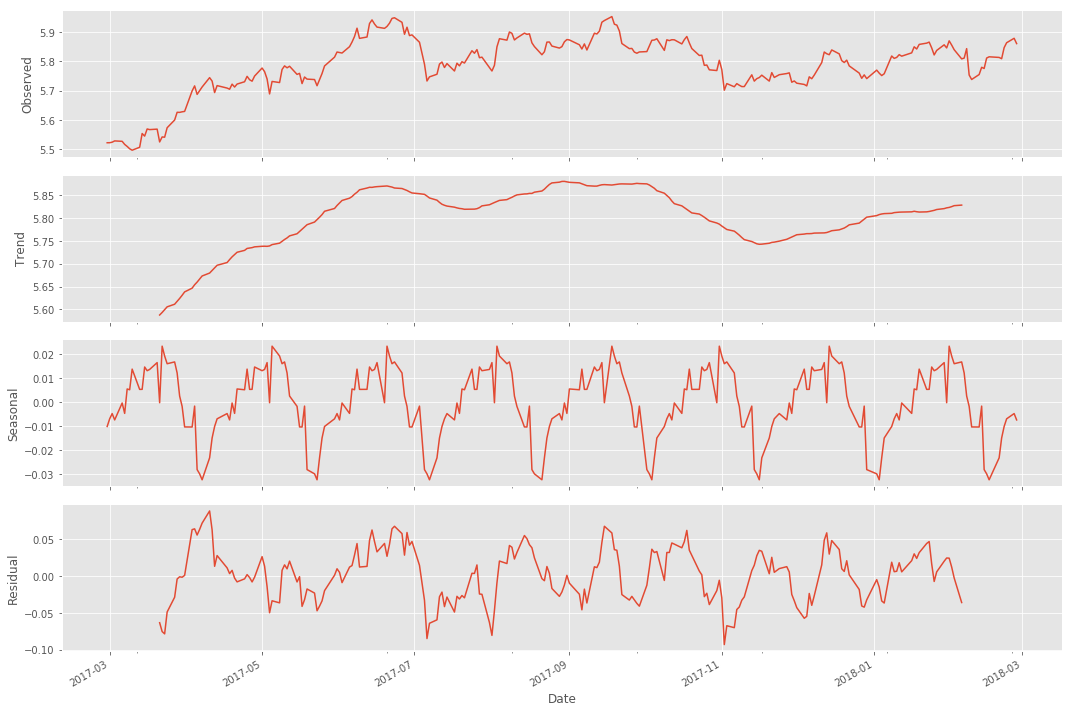

In [81]:
decomposition.plot()

In [82]:
ts = tesla.Closelog
ts_diff = tesla.CloselogDiff
ts_diff.dropna(inplace = True)

In [83]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)

In [84]:
ACF = pd.Series(lag_acf)

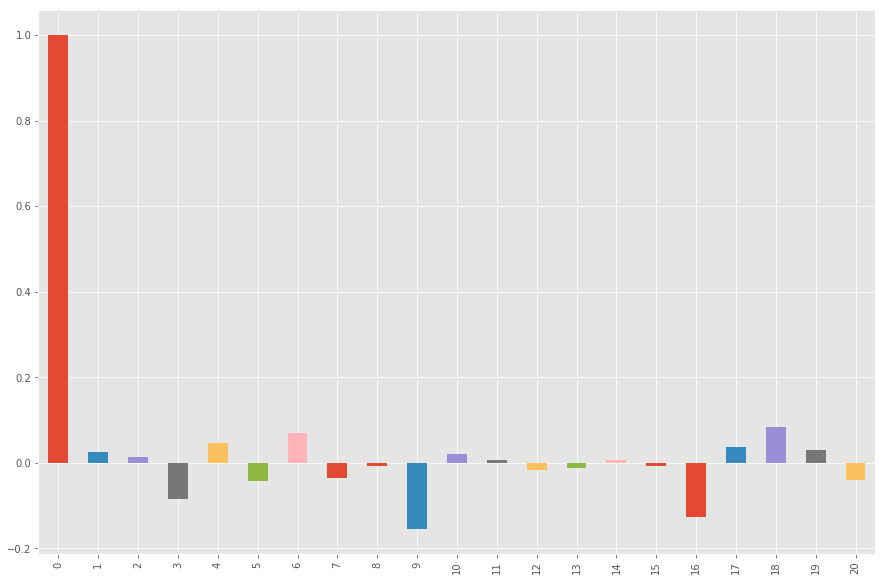

In [85]:
ACF.plot(kind = "bar")